# **📌 Google Colab faylini sozlash**

###  Kutubxonalarni import qilish:



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chiroyli grafiklar uchun
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [101]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

### Datasetni yuklash

In [69]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [70]:
df = pd.read_csv('netflix_titles.csv')

### Dastlabki ko‘rish

In [71]:
df.head()  # dastlabki 5 ta qatordan iborat jadval

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [72]:
df.info()  # ustunlar haqida umumiy ma’lumot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 📌 1. Null qiymatlarni tekshirish
### Biz avval df.isnull().sum() orqali tekshirdik. Endi ularni tozalash uchun quyidagilarni qilamiz:

In [73]:
df.isnull().sum()  # har bir ustunda nechta null borligini aniqlash

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# 📌 2. Sana formatini datetime formatga o‘tkazamiz

In [74]:
# 1. 'director' ustunida juda ko‘p null bo‘lishi mumkin — hozircha qoldiramiz
# 2. 'country', 'date_added', 'rating' ustunlarini to‘ldirish yoki tushuntirish kerak

# Null qiymatlar bilan qatorlarni tashlab yuborish (hozircha eng oson usul)
df_clean = df.dropna(subset=['date_added', 'duration', 'rating']).copy()

# Endi yana tekshirib ko‘ramiz:
df_clean.isnull().sum()

,0
show_id,0
type,0
title,0
director,2621
cast,825
country,829
date_added,0
release_year,0
rating,0
duration,0


### Endi to‘g‘ridan-to‘g‘ri datetime formatga o‘tkazamiz:

In [75]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

### Yana tekshiramiz:

In [76]:
df_clean['date_added'].isnull().sum()

np.int64(88)

### Noto‘g‘ri sanalarni tashlab yuborish

In [77]:
df_clean = df_clean.dropna(subset=['date_added']).copy()

### Bu yo‘l bilan dataset toza va grafiklar uchun tayyor bo‘ladi.

In [78]:
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

# 📌 3. Genre, Country, Director bo‘yicha tahlil

## 🔧 BOSQICHLAR:
### 1. Eng mashhur janrlarni ko‘rsatish

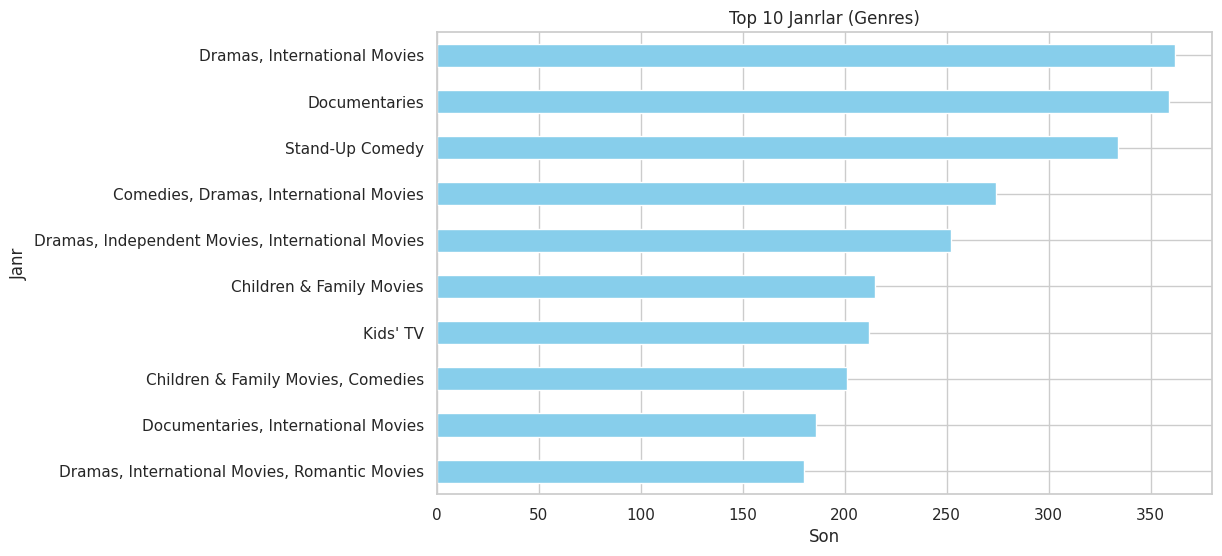

In [79]:
df_clean['listed_in'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Janrlar (Genres)")
plt.xlabel("Son")
plt.ylabel("Janr")
plt.gca().invert_yaxis()
plt.show()

### 2. Eng ko‘p kontent kelgan davlatlar

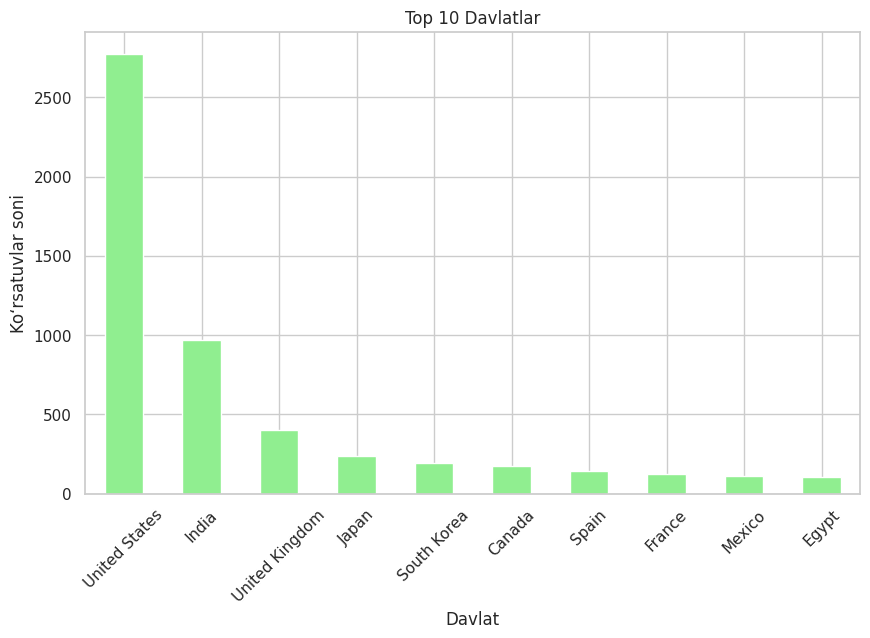

In [80]:
df_clean['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Davlatlar")
plt.ylabel("Ko‘rsatuvlar soni")
plt.xlabel("Davlat")
plt.xticks(rotation=45)
plt.show()

### 3. Eng faol rejissyorlar

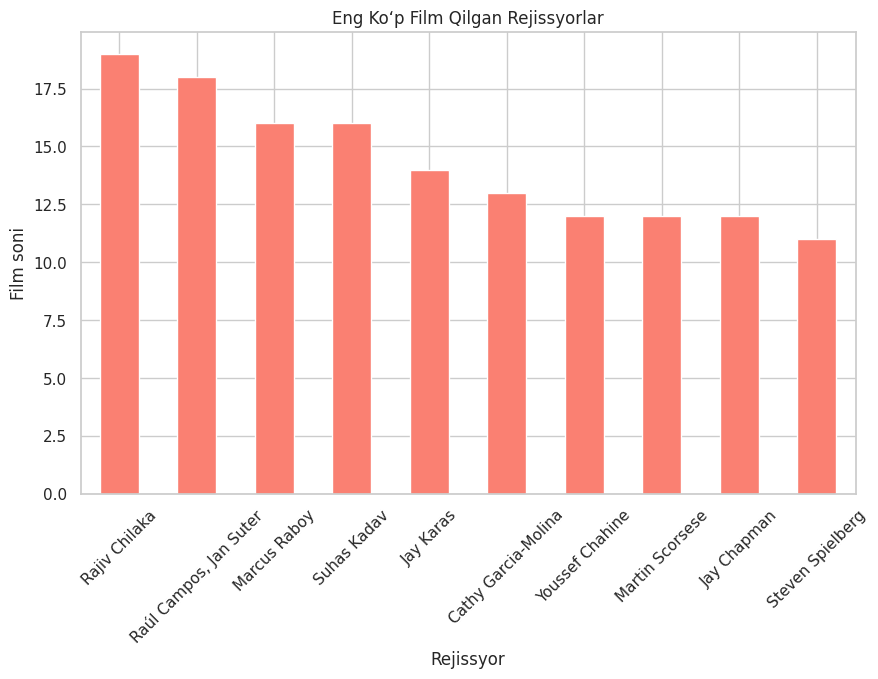

In [81]:
df_clean['director'].dropna().value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Eng Ko‘p Film Qilgan Rejissyorlar")
plt.xlabel("Rejissyor")
plt.ylabel("Film soni")
plt.xticks(rotation=45)
plt.show()

# 📚 4. Sana bilan bog‘liq tahlillar

## 🔧 BOSQICHLAR:
### 1. Yil bo‘yicha qo‘shilgan contentlar soni

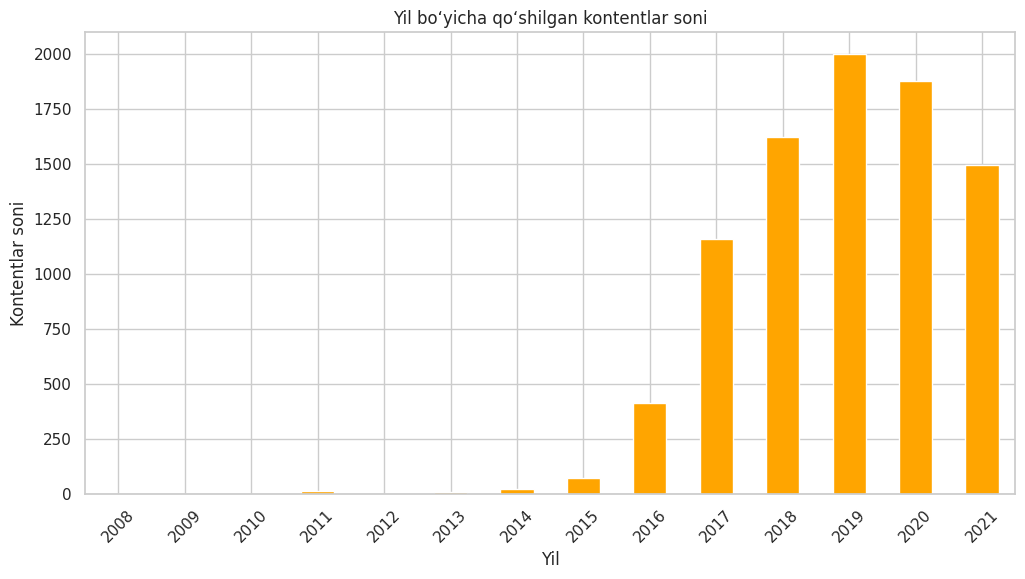

In [82]:
df_clean['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Yil bo‘yicha qo‘shilgan kontentlar soni")
plt.xlabel("Yil")
plt.ylabel("Kontentlar soni")
plt.xticks(rotation=45)
plt.show()

### 2. Oylar bo‘yicha trend (barcha yillarni birlashtirib)

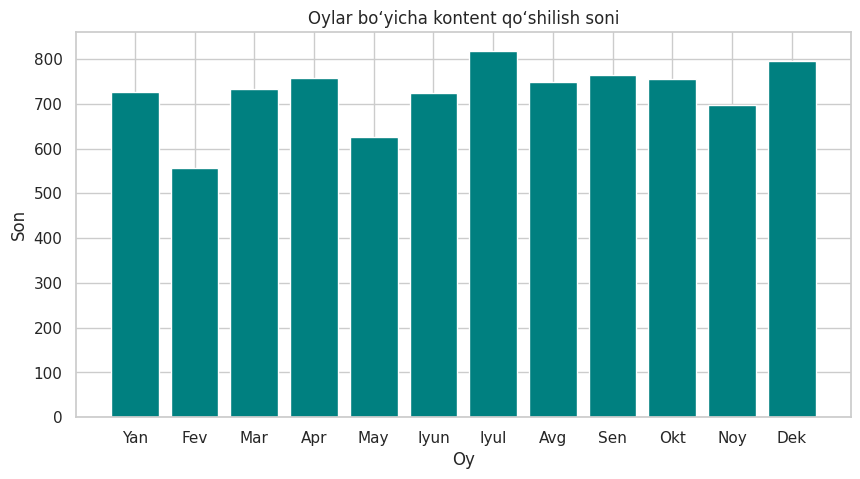

In [83]:
df_clean['month_added'] = df_clean['date_added'].dt.month

month_counts = df_clean['month_added'].value_counts().sort_index()

month_names = ['Yan', 'Fev', 'Mar', 'Apr', 'May', 'Iyun', 'Iyul', 'Avg', 'Sen', 'Okt', 'Noy', 'Dek']

plt.figure(figsize=(10,5))
plt.bar(month_names, month_counts, color='teal')
plt.title("Oylar bo‘yicha kontent qo‘shilish soni")
plt.xlabel("Oy")
plt.ylabel("Son")
plt.show()

### 3. Movies va TV Shows yillar davomida

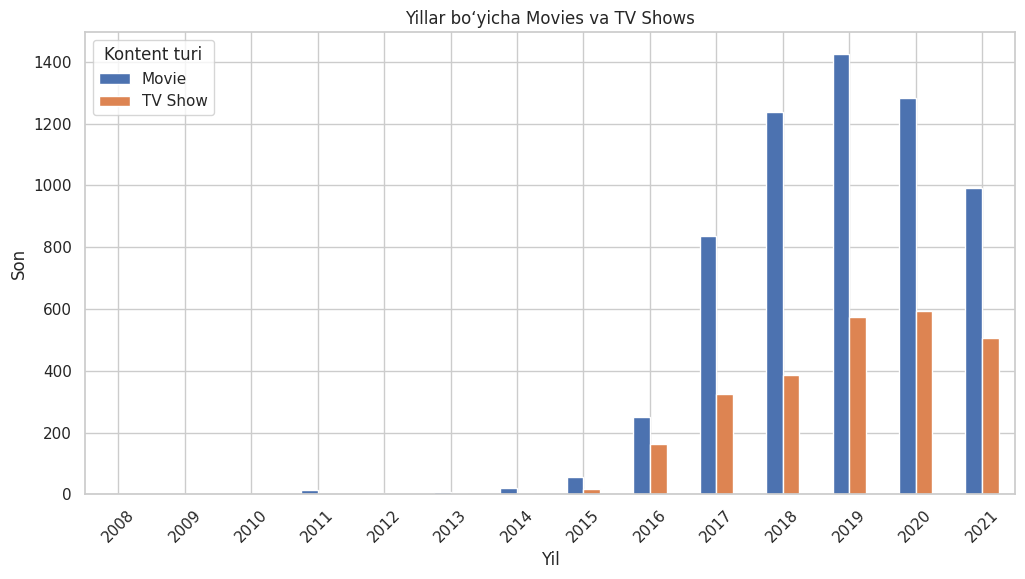

In [84]:
type_year = df_clean.groupby(['year_added', 'type']).size().unstack()

type_year.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Yillar bo‘yicha Movies va TV Shows")
plt.xlabel("Yil")
plt.ylabel("Son")
plt.xticks(rotation=45)
plt.legend(title='Kontent turi')
plt.show()

# 📚 5. Categorical ustunlarni chuqur tahlil qilish (explode)

## 🔧 BOSQICHLAR:
### 1. listed_in ustunini explode qilish

In [85]:
df_exploded = df_clean.copy()
df_exploded['genre'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('genre')

### 2. Eng mashhur janrlarni aniqlash (explode qilingan holatda)

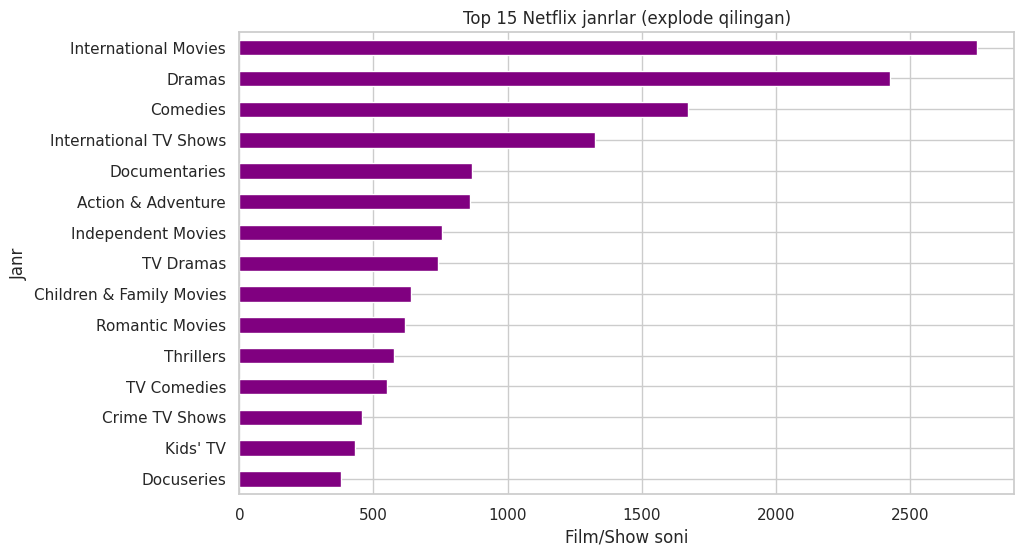

In [86]:
top_genres = df_exploded['genre'].value_counts().head(15)

top_genres.plot(kind='barh', figsize=(10,6), color='purple')
plt.title("Top 15 Netflix janrlar (explode qilingan)")
plt.xlabel("Film/Show soni")
plt.ylabel("Janr")
plt.gca().invert_yaxis()
plt.show()

### 3. Janr + Type (Movie yoki TV Show) kesimida tahlil

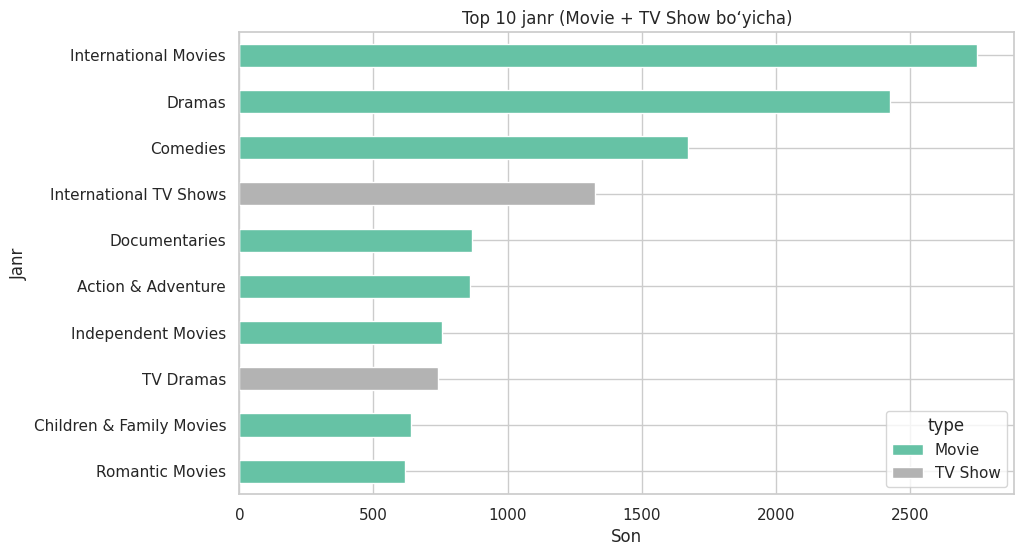

In [87]:
genre_type['total'] = genre_type['Movie'] + genre_type['TV Show']

genre_type.sort_values(by='total', ascending=False).drop(columns='total').head(10).plot(
    kind='barh', figsize=(10,6), stacked=True, colormap='Set2'
)

plt.title("Top 10 janr (Movie + TV Show bo‘yicha)")
plt.xlabel("Son")
plt.ylabel("Janr")
plt.gca().invert_yaxis()
plt.show()

# 📚 6. Eng faol rejissyorlar (director) va aktyorlar (cast) bo‘yicha tahlil

## 🔧 BOSQICHLAR:
### 1. Null qiymatlarni chiqarib tashlaymiz (director va cast uchun)

In [88]:
df_director = df_clean.dropna(subset=['director'])

In [89]:
director_type = df_clean.groupby(['director', 'type']).size().unstack().fillna(0)

### 2. Eng ko‘p ishlagan 10 ta rejissyorni topamiz

In [90]:
director_type['total'] = director_type.sum(axis=1)

# Eng faol 10 ta rejissyorni ajratamiz
top_directors = director_type.sort_values(by='total', ascending=False).head(10)

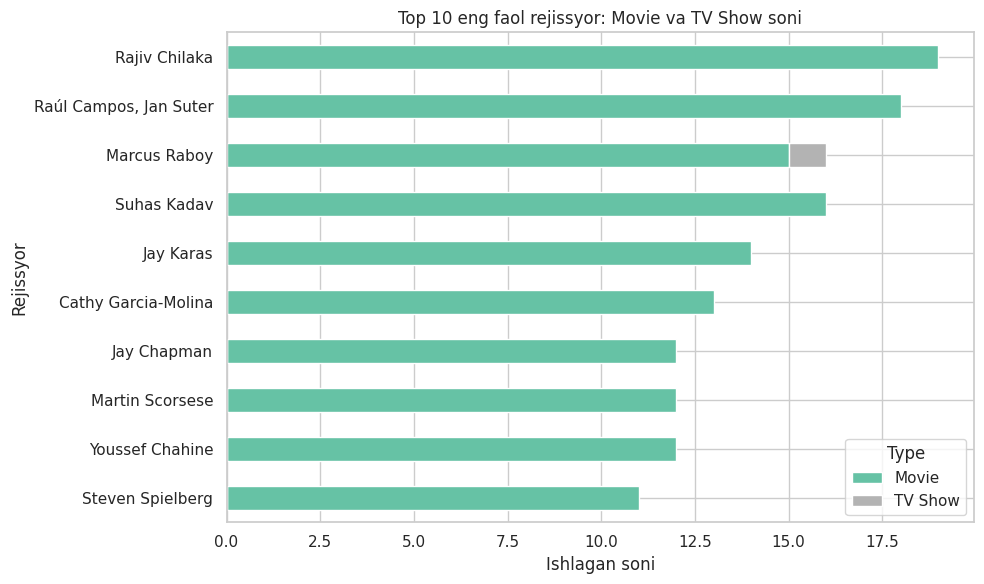

In [91]:
top_directors[['Movie', 'TV Show']].plot(
    kind='barh', figsize=(10,6), stacked=True, colormap='Set2'
)

plt.title("Top 10 eng faol rejissyor: Movie va TV Show soni")
plt.xlabel("Ishlagan soni")
plt.ylabel("Rejissyor")
plt.gca().invert_yaxis()
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### TV Show ishlagan rejissyorlarni alohida ko‘rsatamiz

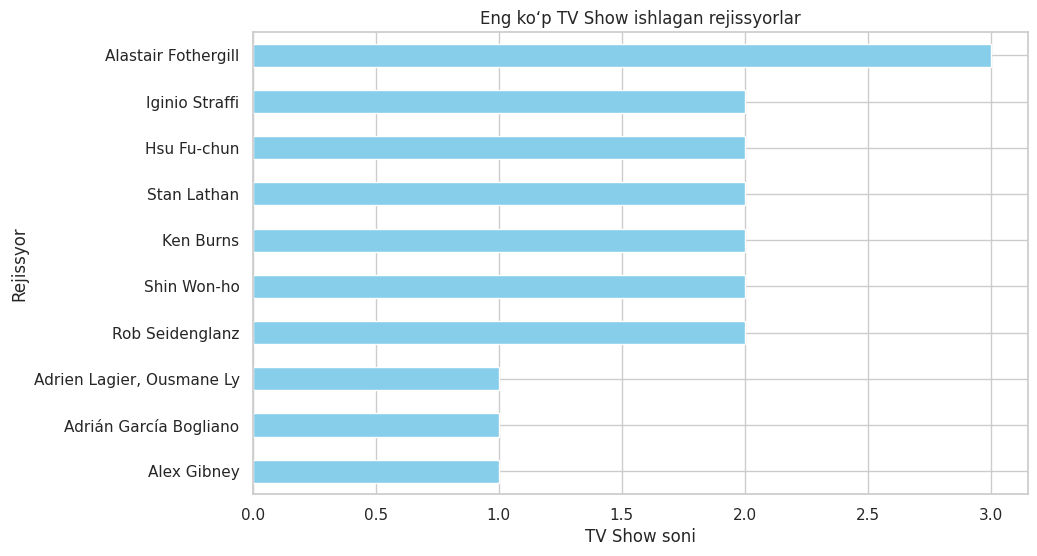

In [92]:
tv_directors_only = director_type[director_type['TV Show'] > 0]

tv_directors_only.sort_values(by='TV Show', ascending=False).head(10)['TV Show'].plot(
    kind='barh', figsize=(10,6), color='skyblue'
)

plt.title("Eng ko‘p TV Show ishlagan rejissyorlar")
plt.xlabel("TV Show soni")
plt.ylabel("Rejissyor")
plt.gca().invert_yaxis()
plt.show()

# 🧠 BONUS

### cast (aktyorlar) ustunida ham explode usuli bilan tahlil qilamiz — chunki unda ham bir nechta aktyorlar bo‘ladi:

/tmp/ipython-input-93-4210519357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast['actor'] = df_cast['cast'].str.split(', ')


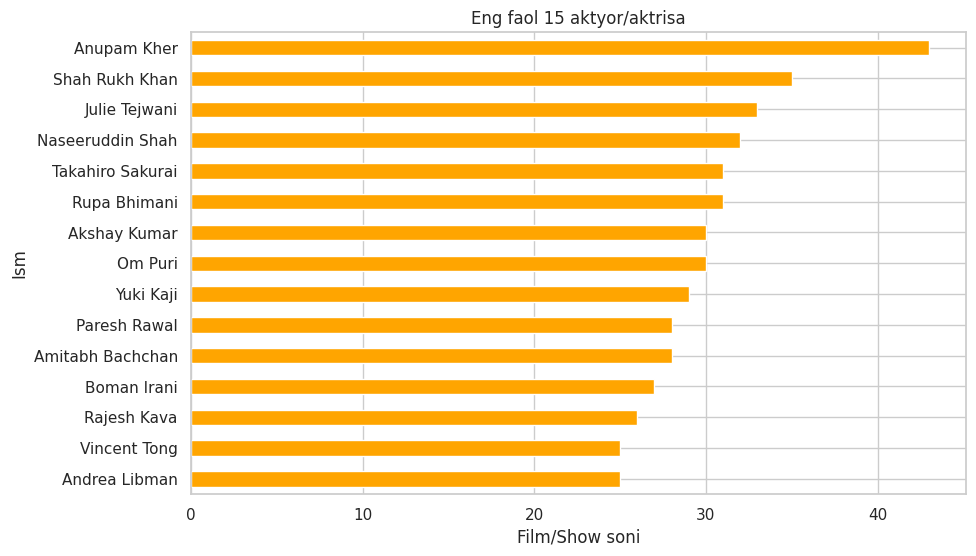

In [93]:
df_cast = df_clean.dropna(subset=['cast'])
df_cast['actor'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('actor')

top_actors = df_cast['actor'].value_counts().head(15)

top_actors.plot(kind='barh', figsize=(10,6), color='orange')
plt.title("Eng faol 15 aktyor/aktrisa")
plt.xlabel("Film/Show soni")
plt.ylabel("Ism")
plt.gca().invert_yaxis()
plt.show()

# 📘 7. Yil bo‘yicha trend tahlili (Netflix’da kontent tarqalishi)

### ✅ 1. date_added ustunidan yil ajratamiz:

In [94]:
df_clean['year_added'] = df_clean['date_added'].dt.year

### ✅ 2. Har yili nechta kontent qo‘shilganini ko‘ramiz:

In [95]:
year_counts = df_clean['year_added'].value_counts().sort_index()

### ✅ 3. Grafik chizamiz:

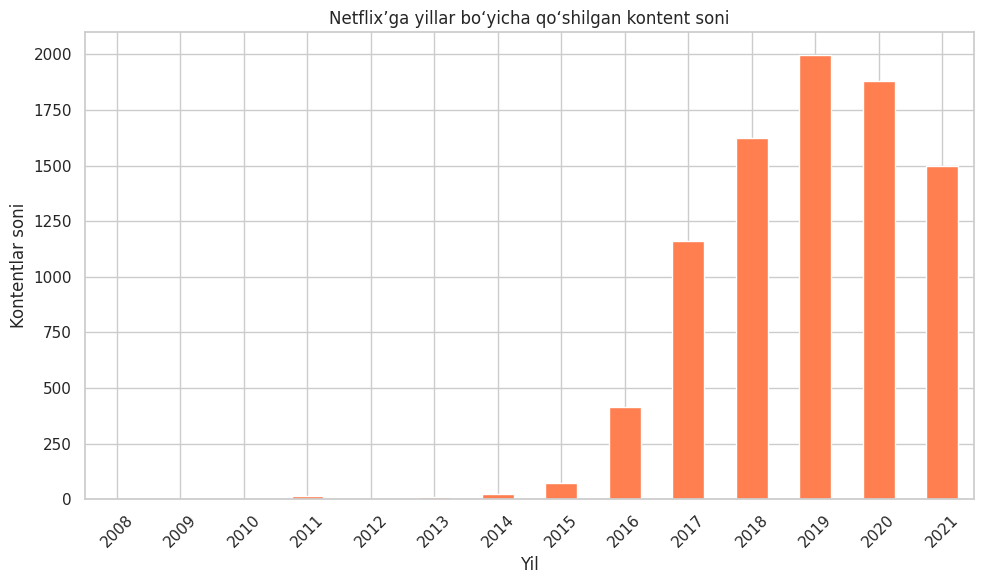

In [96]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='coral')
plt.title("Netflix’ga yillar bo‘yicha qo‘shilgan kontent soni")
plt.xlabel("Yil")
plt.ylabel("Kontentlar soni")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ✅ 4. Movie va TV Show yillar kesimida (taqqoslab) tahlil:

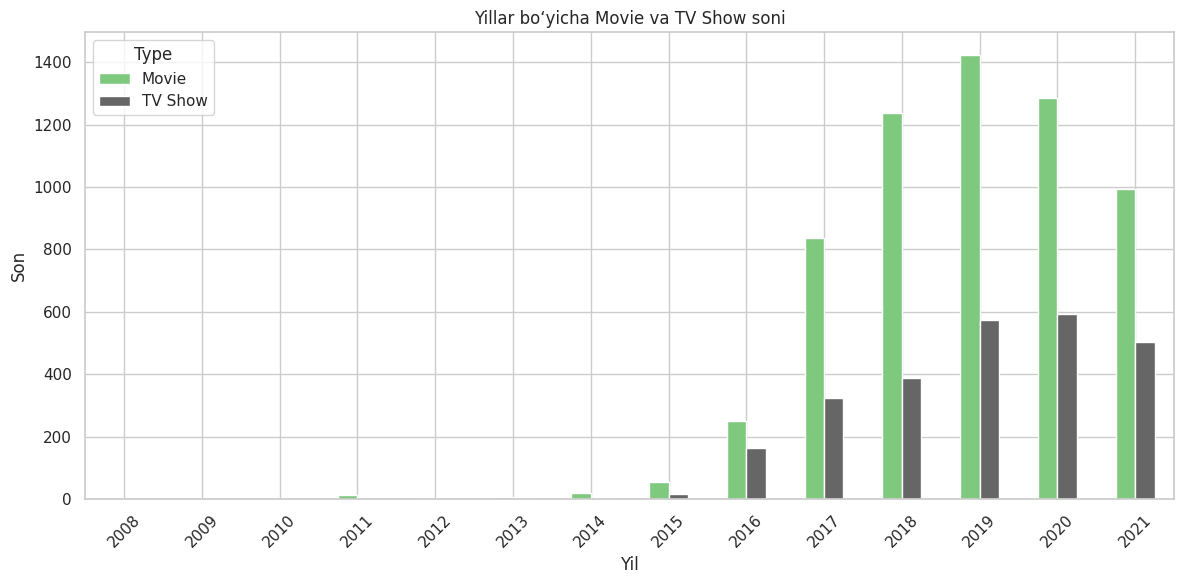

In [97]:
year_type = df_clean.groupby(['year_added', 'type']).size().unstack().fillna(0)

year_type.plot(kind='bar', stacked=False, figsize=(12,6), colormap='Accent')
plt.title("Yillar bo‘yicha Movie va TV Show soni")
plt.xlabel("Yil")
plt.ylabel("Son")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 📘 8-DARS: Country (davlat) bo‘yicha tahlil

### ✅ 1. Birinchi navbatda, ko‘p hollarda country ustunida bir nechta davlat nomlari mavjud bo‘ladi (vergul bilan ajralgan). Biz faqat birinchi davlatni olamiz:

In [98]:
df_clean['main_country'] = df_clean['country'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else x)

### ✅ 2. Top 10 mamlakat bo‘yicha umumiy kontent soni:

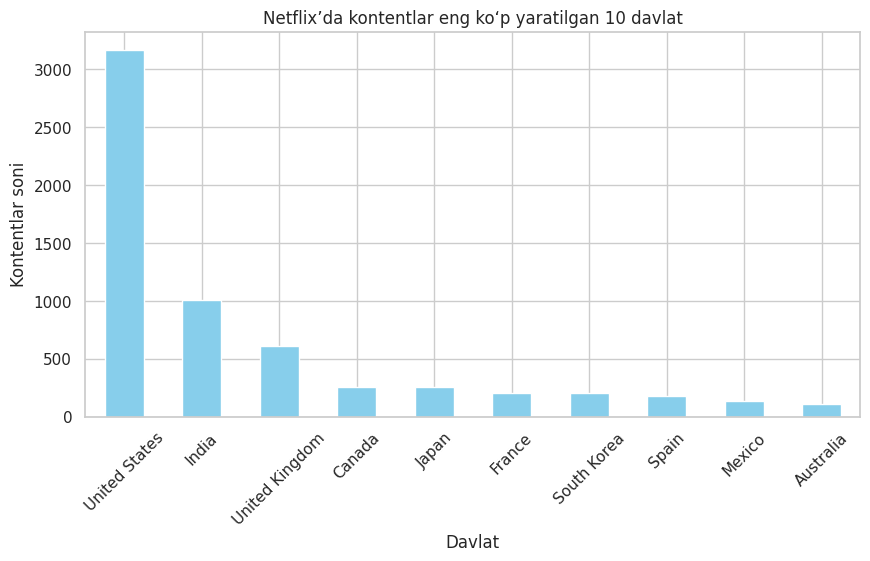

In [99]:
df_clean['main_country'].value_counts().head(10).plot(
    kind='bar', figsize=(10,5), color='skyblue'
)
plt.title("Netflix’da kontentlar eng ko‘p yaratilgan 10 davlat")
plt.xlabel("Davlat")
plt.ylabel("Kontentlar soni")
plt.xticks(rotation=45)
plt.show()

### ✅ 3. Country + Type (Movie/TV Show) tahlili:

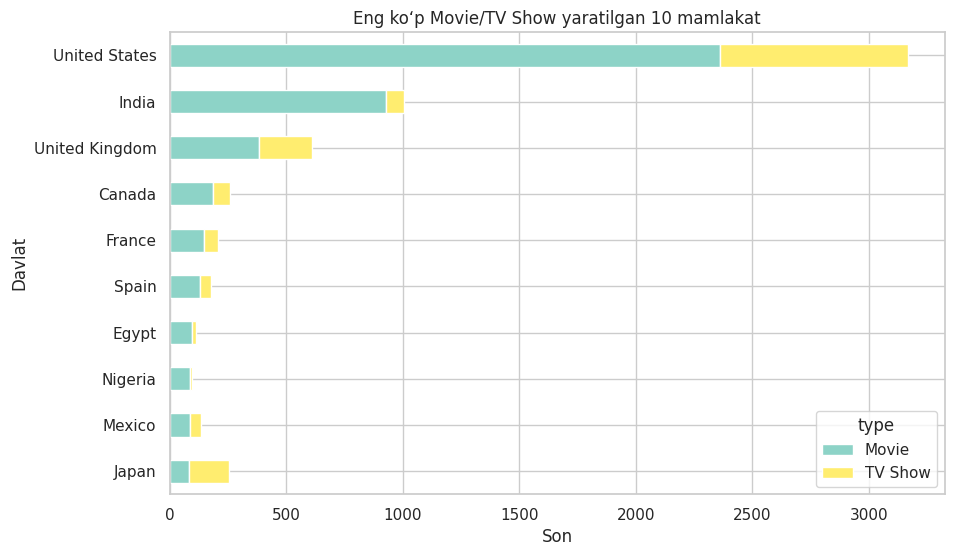

In [100]:
country_type = df_clean.groupby(['main_country', 'type']).size().unstack().fillna(0)
country_type.sort_values(by='Movie', ascending=False).head(10).plot(
    kind='barh', figsize=(10,6), stacked=True, colormap='Set3'
)
plt.title("Eng ko‘p Movie/TV Show yaratilgan 10 mamlakat")
plt.xlabel("Son")
plt.ylabel("Davlat")
plt.gca().invert_yaxis()
plt.show()